In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import wavio
import IPython
from scipy.io.wavfile import write, read

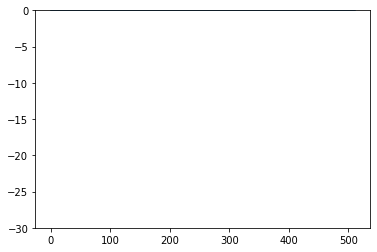

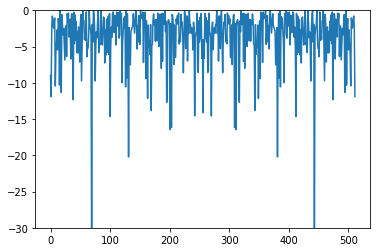

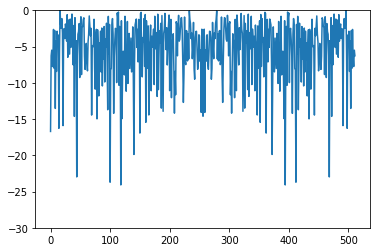

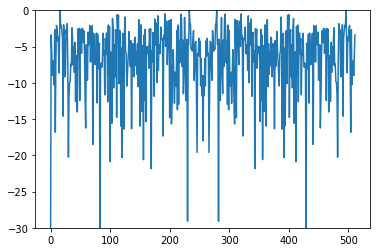

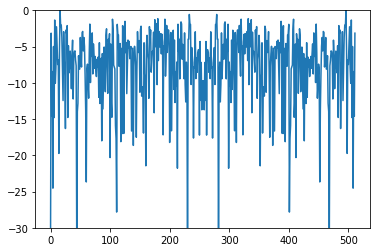

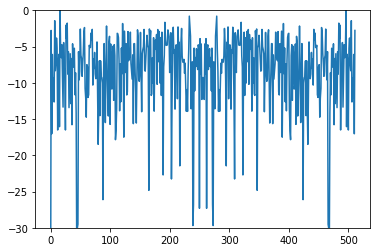

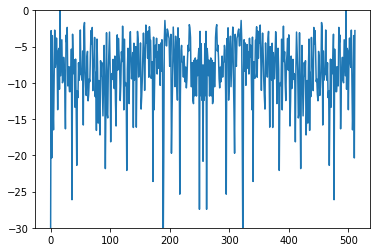

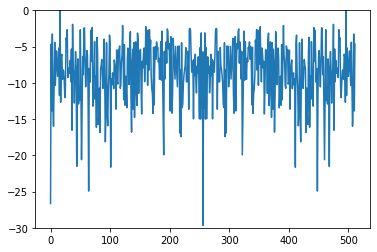

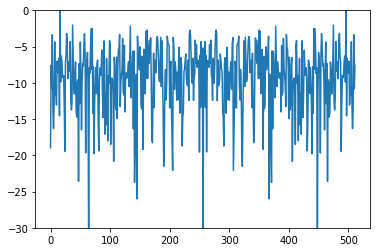

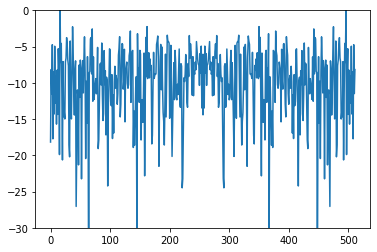

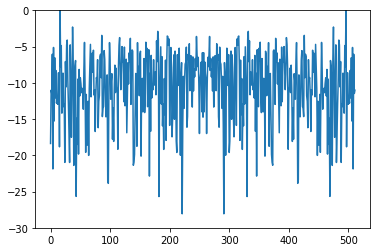

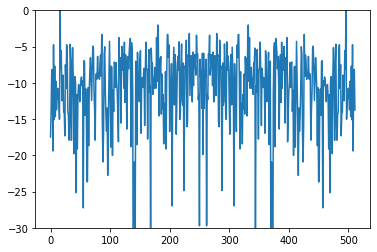

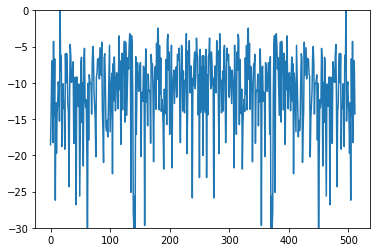

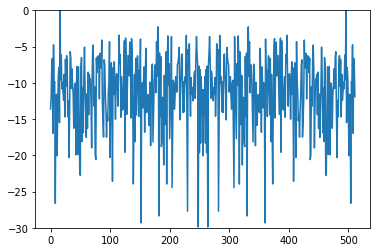

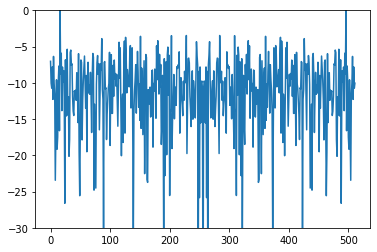

In [2]:
length = 4096
xn = (np.random.rand(length) - 0.5) * 2 + np.sin(128 * np.linspace(0, 2 * np.pi, length))
yn = (np.random.rand(length) - 0.5) * 2 + np.sin(128 * np.linspace(0, 2 * np.pi, length))

frameSize = 128
fftSize = 512
iteration = (length // frameSize) - 1

phi11 = 0 
phi22 = 0 
phi12 = 0

# forgetting factor
lambda_ = 0.1

for index in range(iteration):
    start = index * frameSize
    end = start + fftSize
    xn_ = xn[start:end]
    yn_ = yn[start:end]
    
    Xn = np.fft.fft(xn_)
    Yn = np.fft.fft(yn_)

    phi11 = ((1 - lambda_) * phi11 + lambda_ * Xn * np.conjugate(Xn)).real
    phi22 = ((1 - lambda_) * phi22 + lambda_ * Yn * np.conjugate(Yn)).real
    phi12 = ((1 - lambda_) * phi12 + lambda_ * Xn * np.conjugate(Yn))

    coherence = np.abs(phi12) / np.sqrt(phi11 * phi22)
    plt.plot(20 * np.log10(abs(coherence)))
    plt.ylim(-30, 0)
    plt.show()